# PANDAS

---

# Imports de libs a serem utilizadas

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Utilizando dados em memoria

In [2]:
data = [
    ["Fulano", 12, 7.0, True],
    ["Sicrano", 15, 3.5, False],
    ["Beltrano", 18, 9.3, True],
]
dados = pd.DataFrame(data, columns=["Aluno", "Idade", "Nota", "Aprovado"])
dados

,Aluno,Idade,Nota,Aprovado
0,Fulano,12,7.0,True
1,Sicrano,15,3.5,False
2,Beltrano,18,9.3,True


# Utilizando dados de origem HTML

In [3]:
url = "https://www.federalreserve.gov/releases/h3/current/default.htm"
response = requests.get(url)
html = response.content
soup = BeautifulSoup(html, "html.parser")
table = soup.findAll("table")
html_file = f"<html><body>{table}</body></html>"

df_html = pd.read_html(html_file)

# Como a função read_html retorna uma lista de DataFrames, basta acessar as tabelas pelos índices da lista.
# Como temos três tabelas na página usamos os índices 0, 1 ou 2 para acessar os DataFrames que buscamos
df_html[0].head()

Date      Reserve balances required                              \
         Date Reserve balance requirements 1 Top of penalty- free band 2   
0     Month 7                        Month 7                     Month 7   
1   Aug. 2019                         134639                      148114   
2  Sept. 2019                         134707                      148188   
3   Oct. 2019                         134998                      148509   
4   Nov. 2019                         140705                      154787   

                                 Reserve balances maintained 4  \
  Bottom of penalty- free band 3                         Total   
0                        Month 7                       Month 7   
1                         121167                       1520876   
2                         121227                       1439771   
3                         121489                       1481513   
4                         126625                       1529341   

                                                                 \
  Balances maintained to satisfy reserve balance requirements 5   
0                                            Month 7              
1                                             147555              
2                                             147498              
3                                             148050              
4                                             154256              

                                                                       
  Balances maintained that exceed the top of the penalty- free band 6  
0                                            Month 7                   
1                                            1373321                   
2                                            1292273                   
3                                            1333462                   
4                                            1375085

# Utilizando base de dados externa

In [4]:
df = pd.read_csv(r"data/aluguel.csv", sep=";")

In [5]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [7]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [8]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [9]:
df.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [10]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quartos,32960.0,1.771390,1.717869,0.0,0.0,2.0,3.0,100.0
Vagas,32960.0,1.749059,20.380402,0.0,0.0,1.0,2.0,1966.0
Suites,32960.0,0.665777,1.176525,0.0,0.0,0.0,1.0,70.0
Area,32960.0,231.901547,1135.254152,0.0,55.0,87.0,170.0,90000.0
Valor,32943.0,12952.659715,667521.969419,75.0,1500.0,2800.0,6500.0,120000000.0
Condominio,28867.0,2388.062424,39184.959615,1.0,590.0,990.0,1800.0,6552570.0
IPTU,22723.0,2364.409585,179564.062897,1.0,110.0,250.0,697.0,27053070.0


In [12]:
df.sample(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
27406,Conjunto Comercial/Sala,Barra da Tijuca,0,2,0,130,6900.0,5000.0,NaN
2209,Casa de Condomínio,Barra da Tijuca,4,5,4,1000,28009.0,1600.0,15000.0
8524,Apartamento,Barra da Tijuca,3,3,1,135,10000.0,2600.0,700.0
7062,Apartamento,Botafogo,1,1,0,45,1800.0,500.0,50.0
11509,Galpão/Depósito/Armazém,Cordovil,0,6,0,2731,71018.0,20313.0,4267.0


In [13]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [14]:
tipos_de_dados = pd.DataFrame(df.dtypes, columns=["Tipos de Dados"])
tipos_de_dados.columns.name = "Variaveis"
tipos_de_dados

Variaveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [15]:
df.shape

(32960, 9)

In [16]:
df.shape[0]

32960

In [17]:
df.shape[1]

9

---

In [18]:
df["Tipo"]

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [19]:
df.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [20]:
tipos_imoveis = df["Tipo"]
tipos_imoveis

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [21]:
tipos_imoveis.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [22]:
tipos_imoveis.nunique()

22

In [23]:
tipos_imoveis.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [24]:
tipos_imoveis.drop_duplicates(inplace=True)

In [25]:
tipos_imoveis

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [26]:
tipos_imoveis = pd.DataFrame(tipos_imoveis)

In [27]:
tipos_imoveis.index = range(tipos_imoveis.shape[0])

In [28]:
tipos_imoveis.columns.name = "Id"

In [29]:
tipos_imoveis

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [30]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [31]:
df["Tipo"].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [32]:
selecao = ["Quitinete", "Casa", "Apartamento", "Casa de Condomínio", "Casa de Vila"]

In [33]:
tipos = df["Tipo"].isin(selecao)

In [34]:
df = df[tipos]

In [35]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [36]:
df[df["Tipo"] == "Apartamento"].shape[0]

19532

In [37]:
df[df["Tipo"] == "Casa"].shape[0]

967

In [38]:
df[df["Tipo"] == "Quitinete"].shape[0]

836

In [39]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [40]:
df.isna().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1815
IPTU          6785
dtype: int64

In [41]:
df[df["Valor"].isna()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
13525,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [42]:
df.dropna(subset=["Valor"], inplace=True)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/2271613031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ["Valor"], inplace = True)


In [43]:
df[df["Valor"].isna()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22571 entries, 0 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22571 non-null  object 
 1   Bairro      22571 non-null  object 
 2   Quartos     22571 non-null  int64  
 3   Vagas       22571 non-null  int64  
 4   Suites      22571 non-null  int64  
 5   Area        22571 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20758 non-null  float64
 8   IPTU        15791 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [45]:
df[df["Condominio"].isna()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32859,Casa,Campo Grande,1,0,0,50,600.0,NaN,NaN
32865,Casa de Vila,Pavuna,2,0,0,55,600.0,NaN,NaN
32893,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,NaN,NaN
32911,Casa,Bento Ribeiro,2,1,0,60,1400.0,NaN,NaN


In [46]:
selecao = (df["Tipo"] == "Apartamento") & (df["Condominio"].isnull())
df = df[~selecao]

In [47]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [48]:
df.fillna({"Condominio": 0, "IPTU": 0}, inplace=True)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/742185034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"Condominio": 0, "IPTU": 0}, inplace = True)


In [49]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [50]:
df["Valor_bruto"] = df["Valor"] + df["Condominio"] + df["IPTU"]

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/3217163827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Valor_bruto"] = df["Valor"] + df["Condominio"] + df["IPTU"]


In [51]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0


In [52]:
df["Valor_m2"] = (df["Valor"] / df["Area"]).round(2)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/2119826040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Valor_m2"] = (df["Valor"] / df["Area"]).round(2)


In [53]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_bruto,Valor_m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17


In [54]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio',
       'Casa de Vila'], dtype=object)

In [55]:
condicao = ["Casa", "Casa de Condomínio", "Casa de Vila"]

In [56]:
df["Tipo_agregado"] = df["Tipo"].apply(
    lambda x: "Casa" if x in condicao else "Apartamento"
)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/2028688983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tipo_agregado"] = df["Tipo"].apply(lambda x: "Casa" if x in condicao else "Apartamento")


In [57]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_bruto,Valor_m2,Tipo_agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Casa
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,Apartamento
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,Apartamento
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,Apartamento
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,Apartamento


In [58]:
df.drop(columns=["Valor_bruto"], axis=1, inplace=True)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/1597494080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["Valor_bruto"], axis = 1, inplace = True)


In [59]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [60]:
df.Tipo.value_counts()

Apartamento           18780
Casa de Condomínio      996
Casa                    965
Quitinete               836
Casa de Vila            249
Name: Tipo, dtype: int64

In [61]:
grupo_por_bairro = df.groupby("Bairro")

In [62]:
grupo_por_bairro

In [63]:
for bairro, dados in grupo_por_bairro:
    print(bairro)

Abolição
Alto da Boa Vista
Anchieta
Andaraí
Anil
Arpoador
Bancários
Bangu
Barra da Tijuca
Barra de Guaratiba
Benfica
Bento Ribeiro
Bonsucesso
Botafogo
Braz de Pina
Cachambi
Cachamorra
Cacuia
Caju
Camorim
Campinho
Campo Grande
Cascadura
Catete
Catumbi
Cavalcanti
Centro
Cidade Jardim
Cidade Nova
Cocotá
Coelho Neto
Colégio
Copacabana
Cordovil
Cosme Velho
Cosmos
Curicica
Del Castilho
Encantado
Engenho Novo
Engenho da Rainha
Engenho de Dentro
Estácio
Flamengo
Freguesia (Ilha do Governador)
Freguesia (Jacarepaguá)
Fátima
Gamboa
Gardênia Azul
Glória
Grajaú
Guadalupe
Guaratiba
Gávea
Higienópolis
Honório Gurgel
Humaitá
Icaraí
Ilha do Governador
Inhaúma
Inhoaíba
Ipanema
Irajá
Itanhangá
Jabour
Jacarepaguá
Jacaré
Jardim América
Jardim Botânico
Jardim Carioca
Jardim Guanabara
Jardim Oceânico
Jardim Sulacap
Joá
Lagoa
Lapa
Laranjeiras
Largo do Machado
Leblon
Leme
Lins de Vasconcelos
Madureira
Magalhães Bastos
Maracanã
Marechal Hermes
Maria da Graça
Moneró
Méier
Olaria
Oswaldo Cruz
Paciência
Padre Mig

In [64]:
grupo_por_bairro[["Valor", "Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [65]:
grupo_por_bairro.Valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [66]:
grupo_por_bairro.Valor.aggregate(["min", "max"]).rename(
    {"min": "Mínimo", "max": "Máximo"}
)

,min,max
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(12, 8))

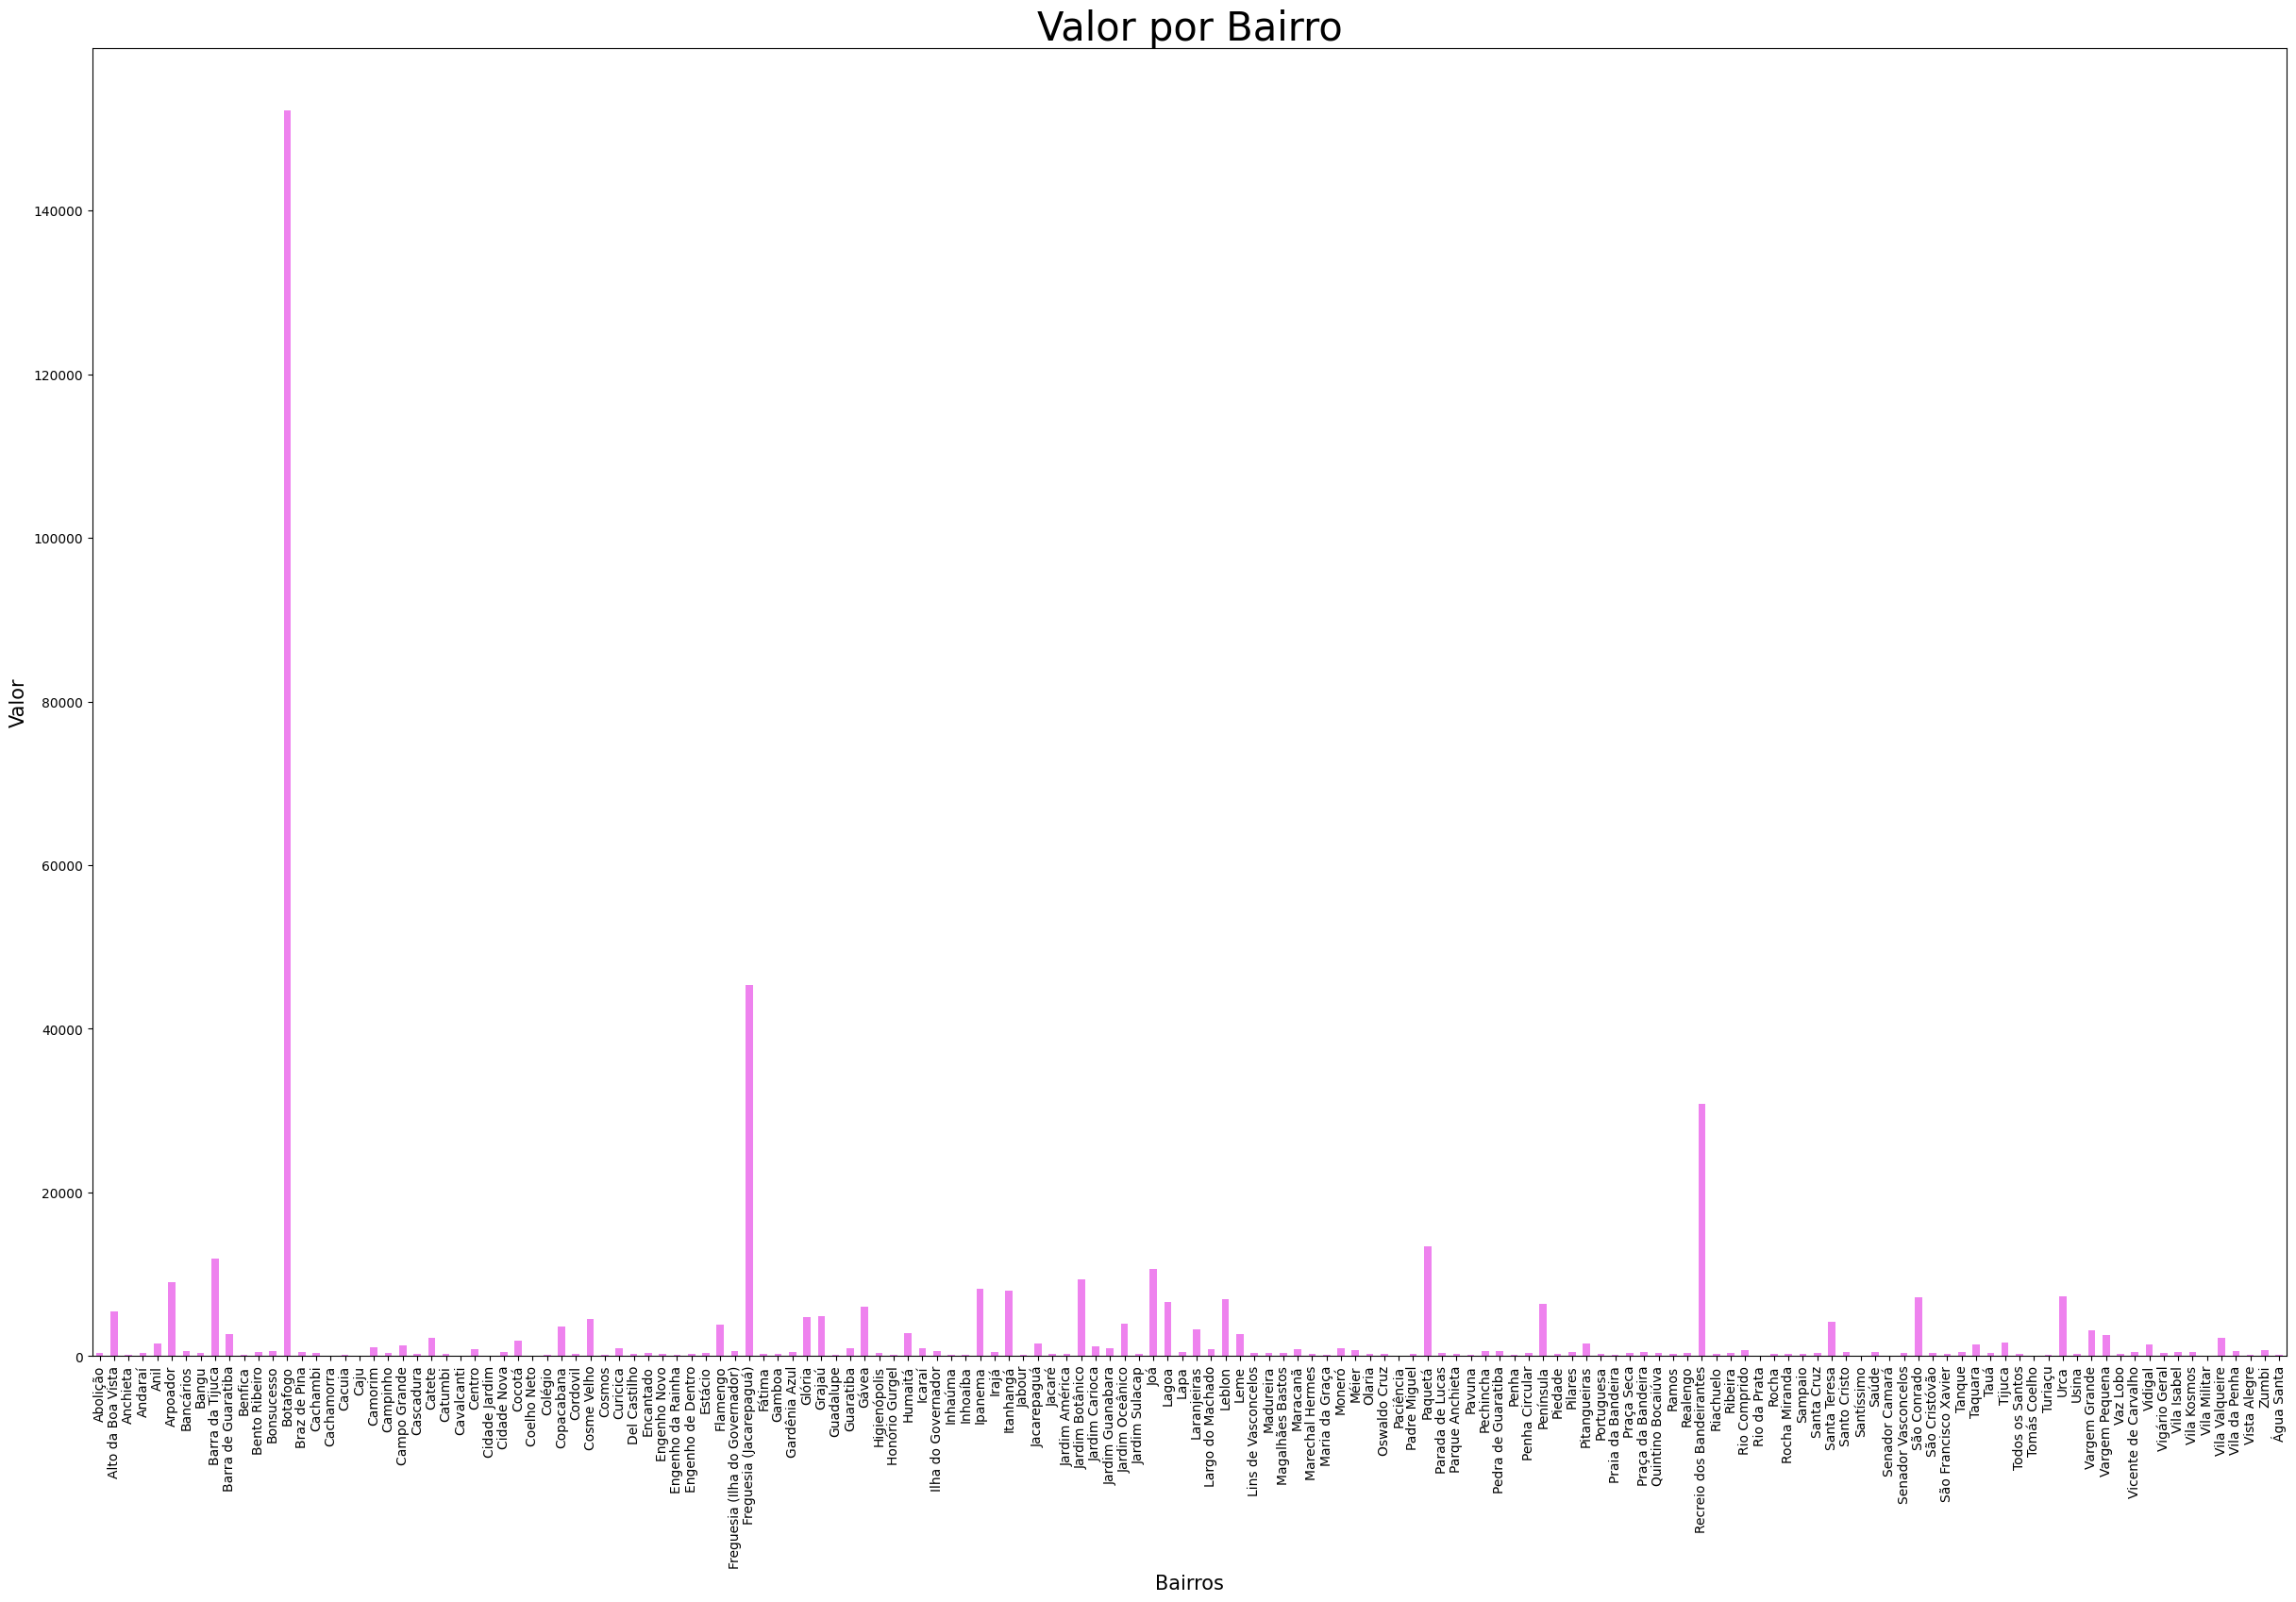

In [68]:
plt.figure(figsize=(30, 18))
grupo_por_bairro.Valor.std().plot.bar(color="Violet")
plt.xlabel("Bairros", fontsize=15)
plt.ylabel("Valor", fontsize=15)
plt.title("Valor por Bairro", fontsize=30);

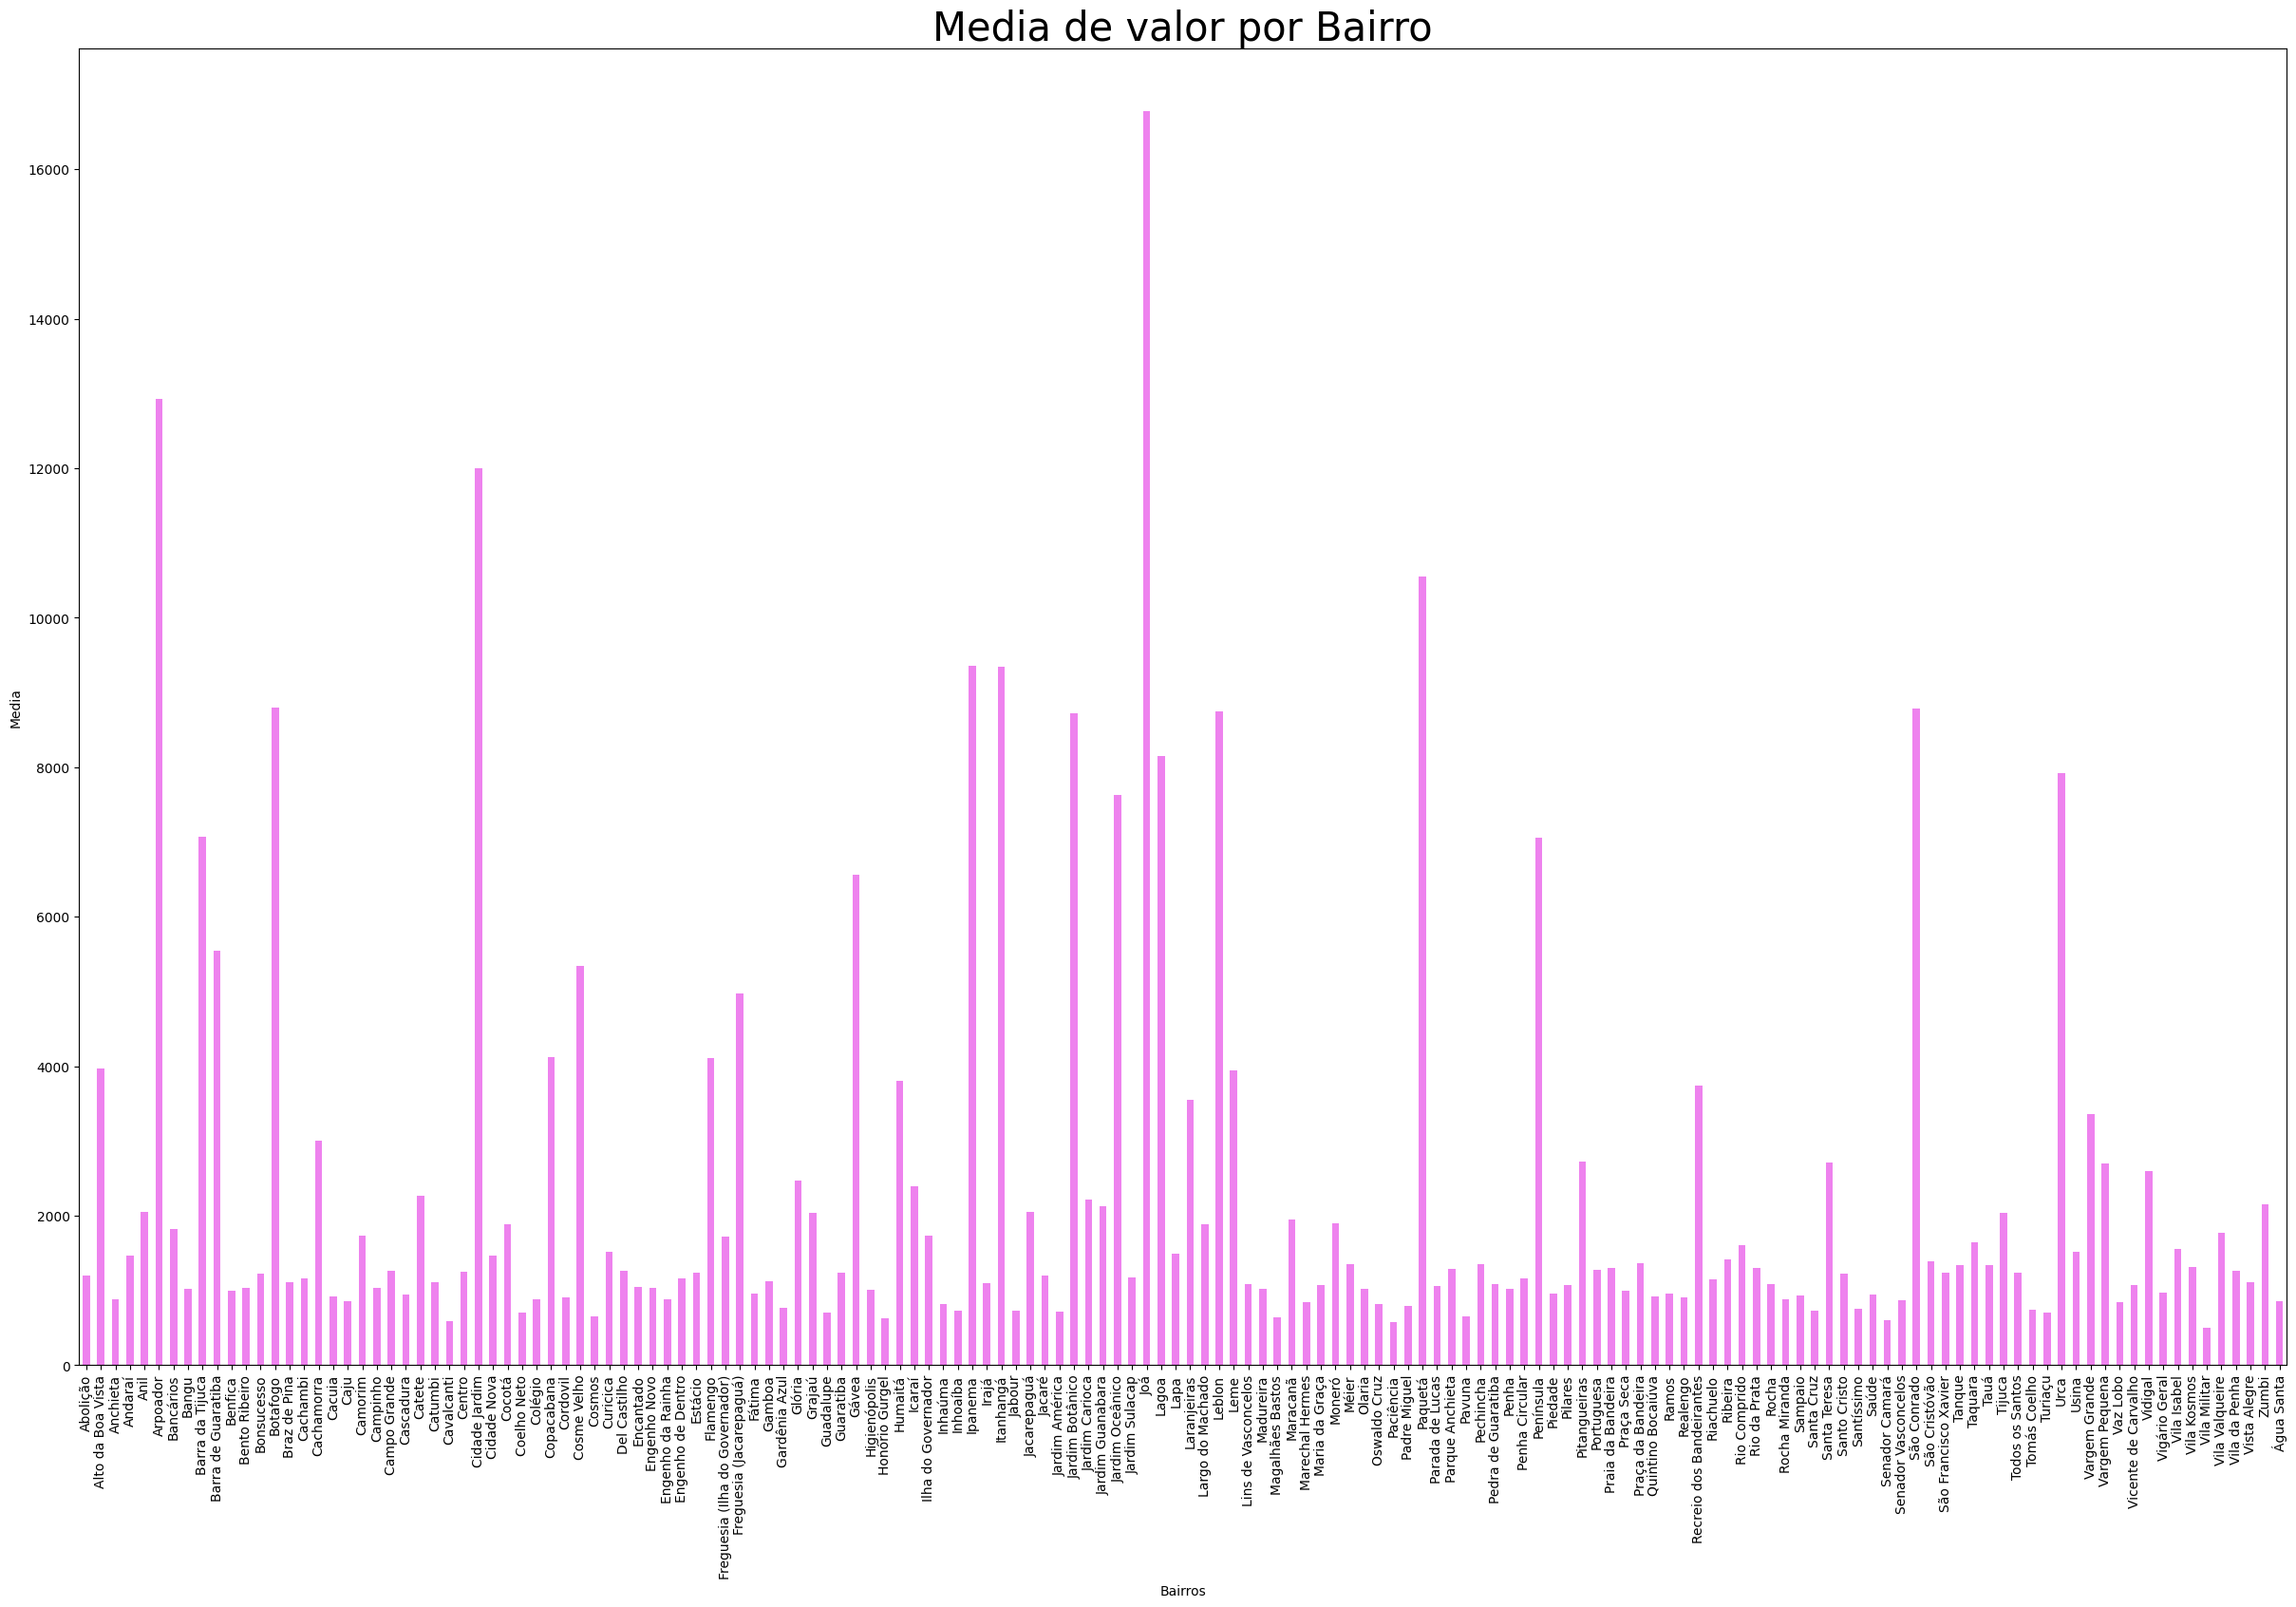

In [69]:
plt.figure(figsize=(30, 18))
fig = grupo_por_bairro.Valor.mean().plot.bar(color="Violet")
fig.set_xlabel("Bairros")
fig.set_ylabel("Media")
fig.set_title("Media de valor por Bairro", {"fontsize": 30});

<AxesSubplot: >

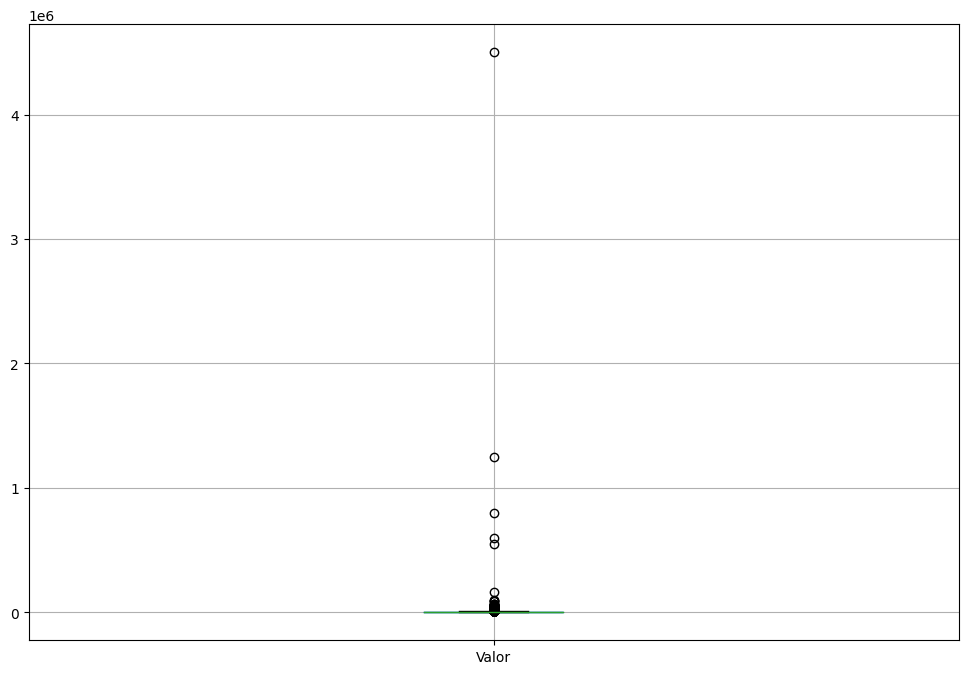

In [72]:
df.boxplot(["Valor"])

In [73]:
df[df["Valor"] >= 500_000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_agregado
11712,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
16206,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
19256,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [74]:
valor = df.Valor

In [75]:
valor

0        1700.0
1        7000.0
3         800.0
4         800.0
6        1300.0
          ...  
32953     900.0
32955     800.0
32956    1800.0
32957    1400.0
32958    3000.0
Name: Valor, Length: 21826, dtype: float64

In [78]:
Q1 = valor.quantile(0.25)  # primeiro quartil
Q3 = valor.quantile(0.75)  # terceiro quartil
IIQ = Q3 - Q1  # intervalo entre quartis
limite_inferior = Q1 - 1.5 * IIQ  # limite inferior para outliers
limite_superior = Q3 + 1.5 * IIQ  # limite superior para outliers

In [79]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [81]:
df_new = df[selecao]

<AxesSubplot: >

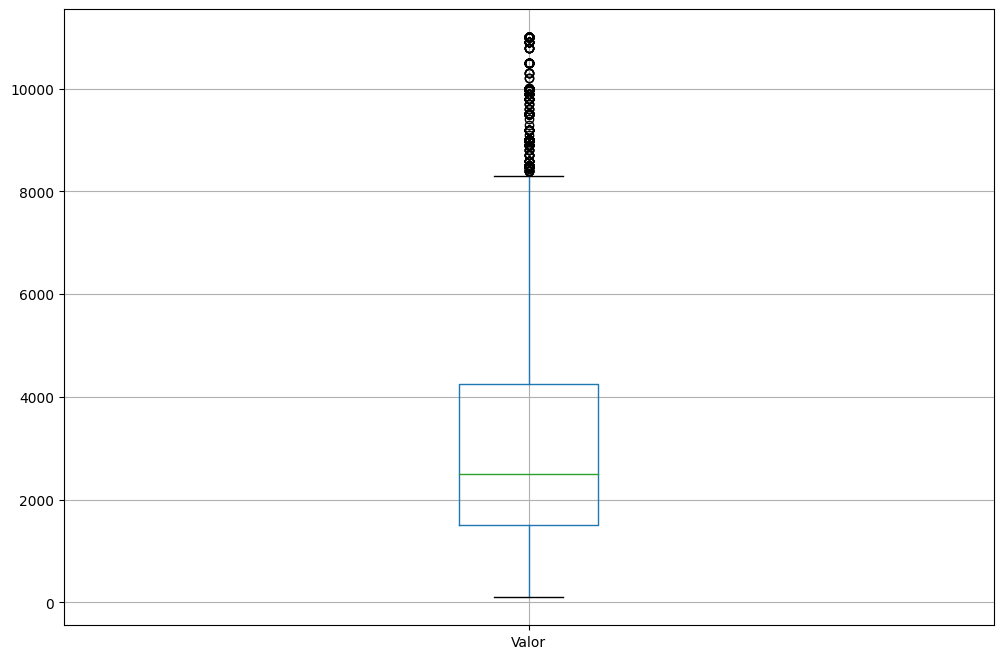

In [82]:
df_new.boxplot(["Valor"])

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

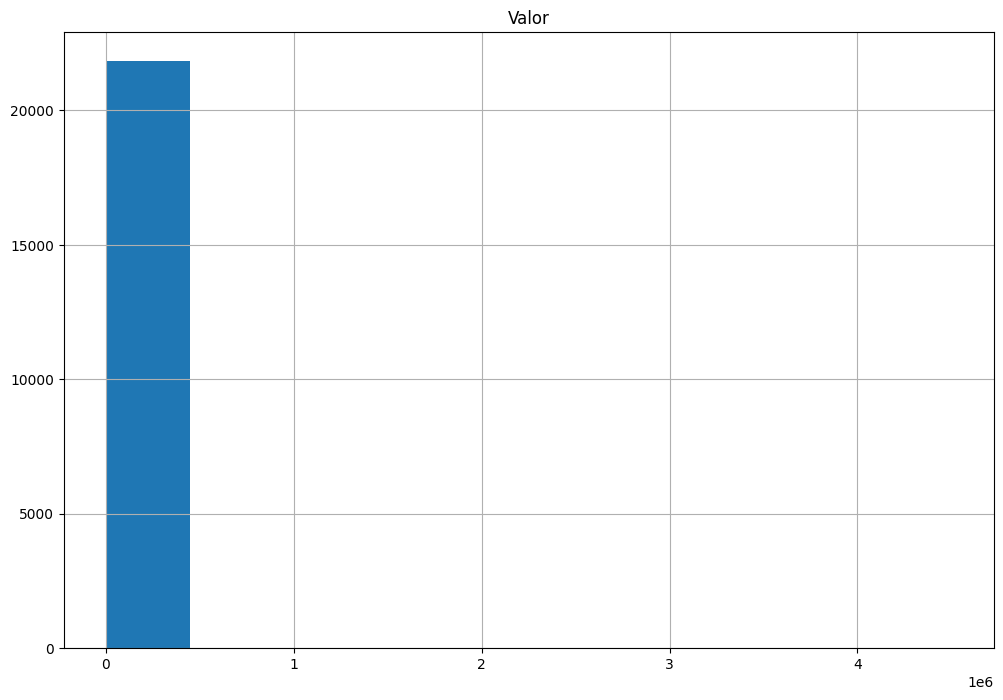

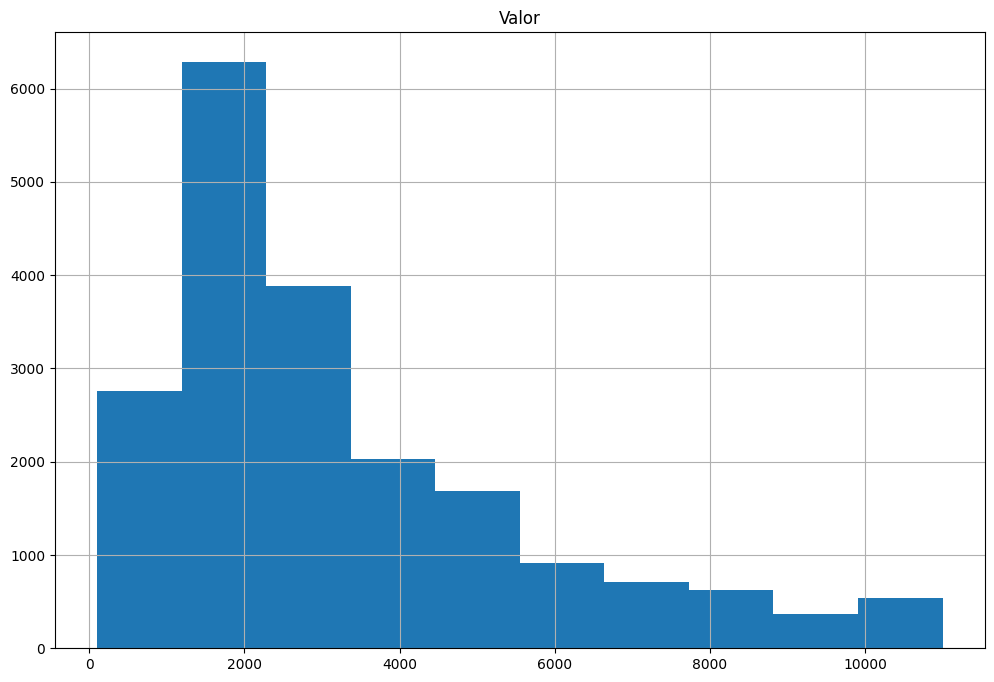

In [83]:
df.hist(["Valor"])
df_new.hist(["Valor"])

In [86]:
grupos_tipo = df.groupby("Tipo")["Valor"]
grupos_tipo.groups

{'Apartamento': [3, 4, 6, 11, 12, 13, 15, 19, 20, 21, 23, 24, 27, 28, 30, 32, 33, 34, 36, 37, 40, 41, 43, 44, 47, 48, 49, 50, 51, 54, 55, 56, 57, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 77, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 106, 107, 109, 111, 114, 118, 119, 121, 122, 124, 125, 126, 131, 132, 133, 134, 135, 137, 139, 140, 141, 147, 148, 152, 153, 154, 158, 160, 162, 163, 164, 165, 167, 170, 173, 177, 179, 180, 182, ...], 'Casa': [1, 31, 74, 82, 138, 142, 216, 236, 269, 357, 372, 378, 400, 433, 468, 477, 507, 516, 538, 571, 578, 602, 635, 646, 703, 704, 716, 765, 808, 809, 844, 851, 855, 929, 934, 944, 957, 958, 1001, 1022, 1056, 1085, 1093, 1143, 1155, 1170, 1287, 1308, 1407, 1474, 1537, 1547, 1656, 1661, 1665, 1712, 1741, 1860, 1873, 1962, 1988, 2013, 2051, 2117, 2138, 2143, 2165, 2173, 2219, 2222, 2241, 2384, 2410, 2492, 2503, 2508, 2519, 2536, 2569, 2578, 2642, 2717, 2763, 2830, 2874, 2908, 2921, 2948, 3049, 3075, 3105, 3134, 3171, 3180, 3182, 32

In [87]:
Q1 = grupos_tipo.quantile(0.25)  # primeiro quartil
Q3 = grupos_tipo.quantile(0.75)  # terceiro quartil
IIQ = Q3 - Q1  # intervalo entre quartis
limite_inferior = Q1 - 1.5 * IIQ  # limite inferior para outliers
limite_superior = Q3 + 1.5 * IIQ  # limite superior para outliers

In [88]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [89]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [90]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [91]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [92]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [93]:
limite_superior["Apartamento"]

9950.0

In [101]:
df_new_2 = pd.DataFrame()

for tipo in grupos_tipo.groups.keys():
    is_tipo = df["Tipo"] == tipo
    isin_limit = (df["Valor"] >= limite_inferior[tipo]) & (
        df["Valor"] <= limite_superior[tipo]
    )
    selecao = is_tipo & isin_limit
    dados_selecao = df[selecao]
    df_new_2 = pd.concat([df_new_2, dados_selecao])

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

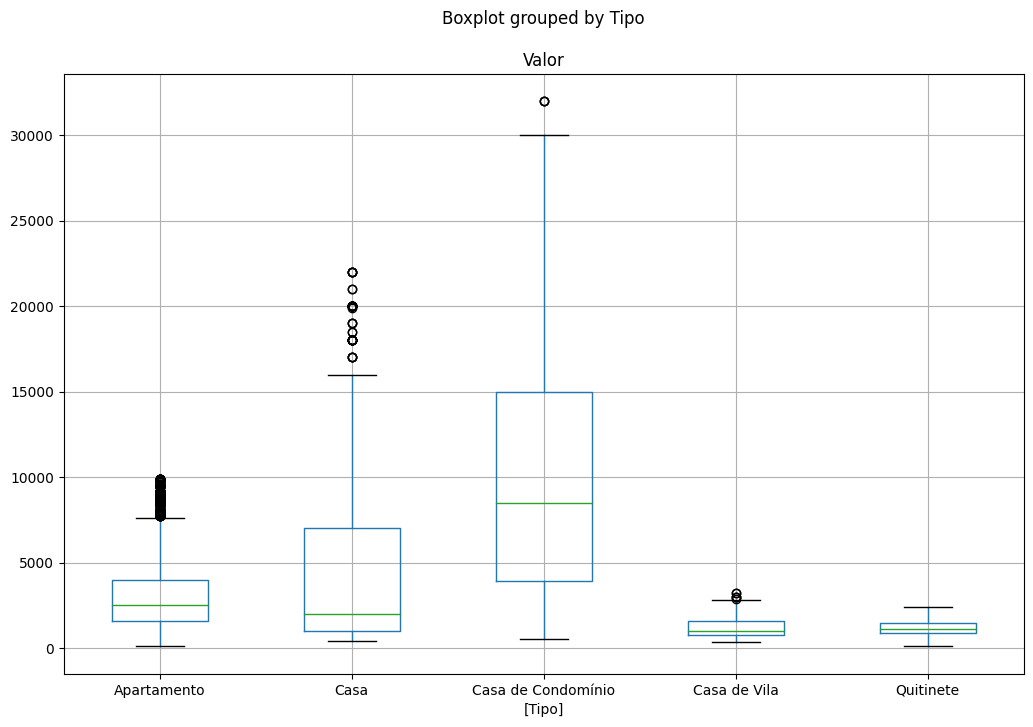

In [102]:
df_new_2.boxplot(["Valor"], by=["Tipo"])

In [103]:
df = df_new_2.copy()

In [104]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_agregado
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

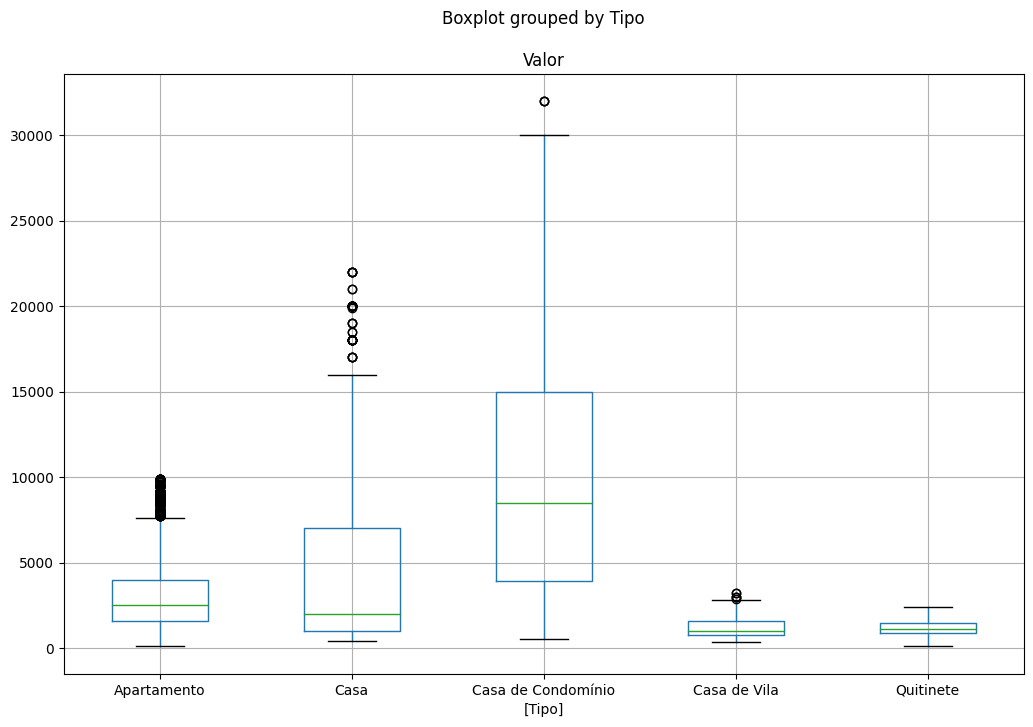

In [105]:
df.boxplot(["Valor"], by=["Tipo"])

In [124]:
area = plt.figure()

<Figure size 1200x800 with 0 Axes>

In [125]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

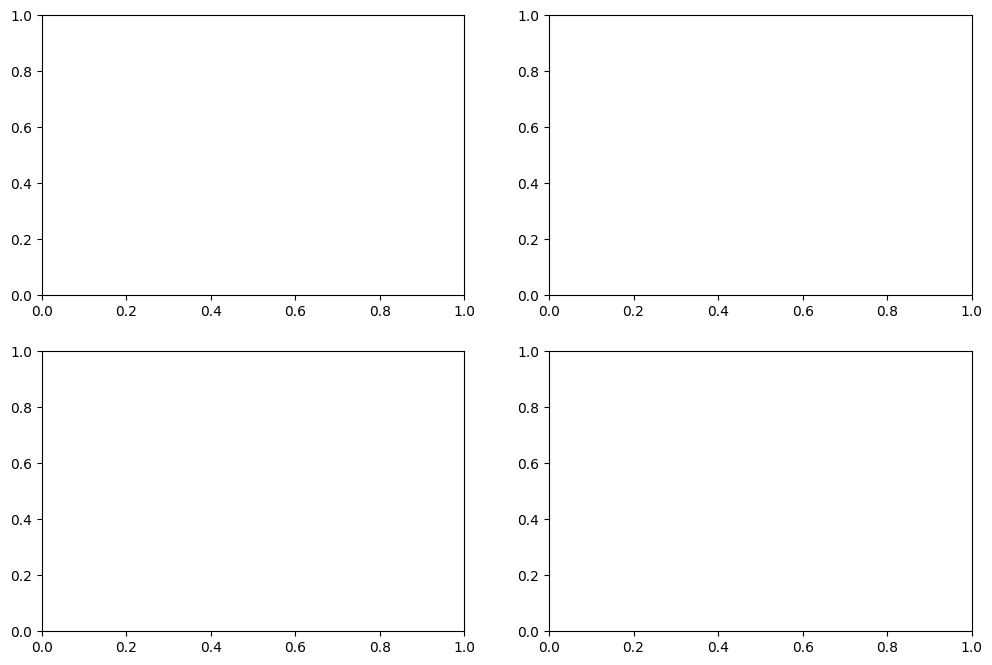

In [126]:
area

In [127]:
g1.scatter(df.Valor, df.Area)
g1.set_title("Valor por Area")

g2.hist(df.Valor)
g2.set_title("Histograma")

graph_g3 = df.Valor.sample(100).reset_index(drop=True)
g3.plot(graph_g3)
g3.set_title("Amostras")

grupo_g4 = df.groupby("Tipo")["Valor"]
g4.bar(grupo_g4.mean().index, grupo_g4.mean().values)
g4.set_title("Barras")
g4.set_xticklabels(labels=grupo_g4.mean().index, rotation=45)

/var/folders/0x/lgbrscr56sq1gtx792kyzgvc0000gn/T/ipykernel_1170/4069662452.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g4.set_xticklabels(labels = grupo_g4.mean().index, rotation = 45)


[Text(0, 0, 'Apartamento'),
 Text(1, 0, 'Casa'),
 Text(2, 0, 'Casa de Condomínio'),
 Text(3, 0, 'Casa de Vila'),
 Text(4, 0, 'Quitinete')]

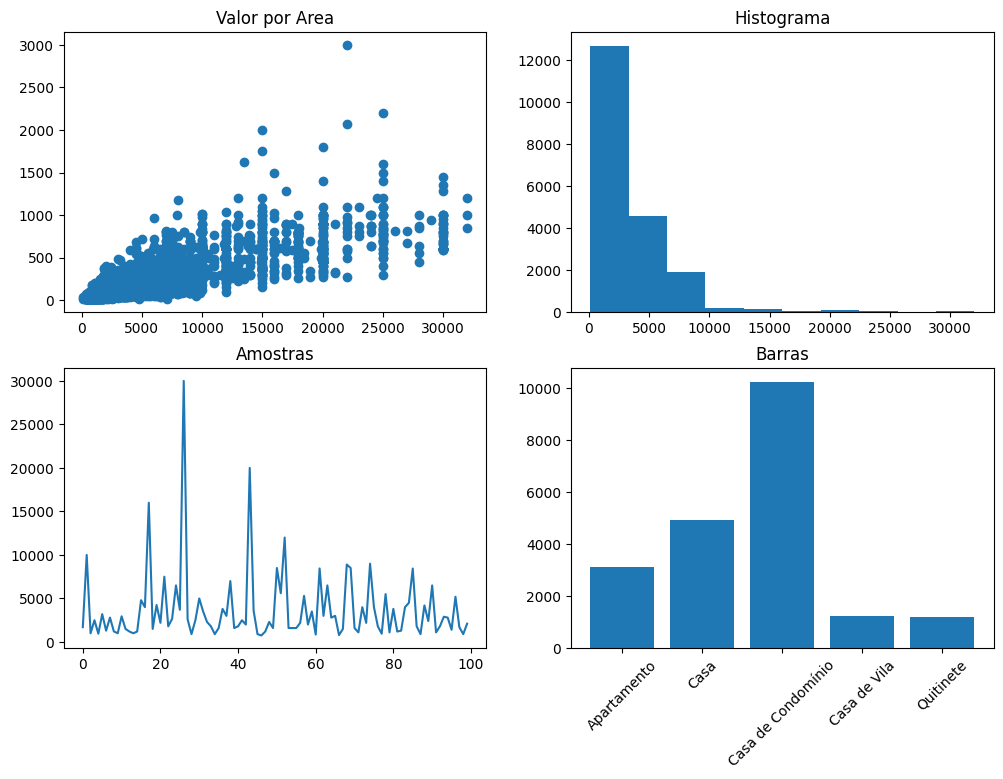

In [128]:
area